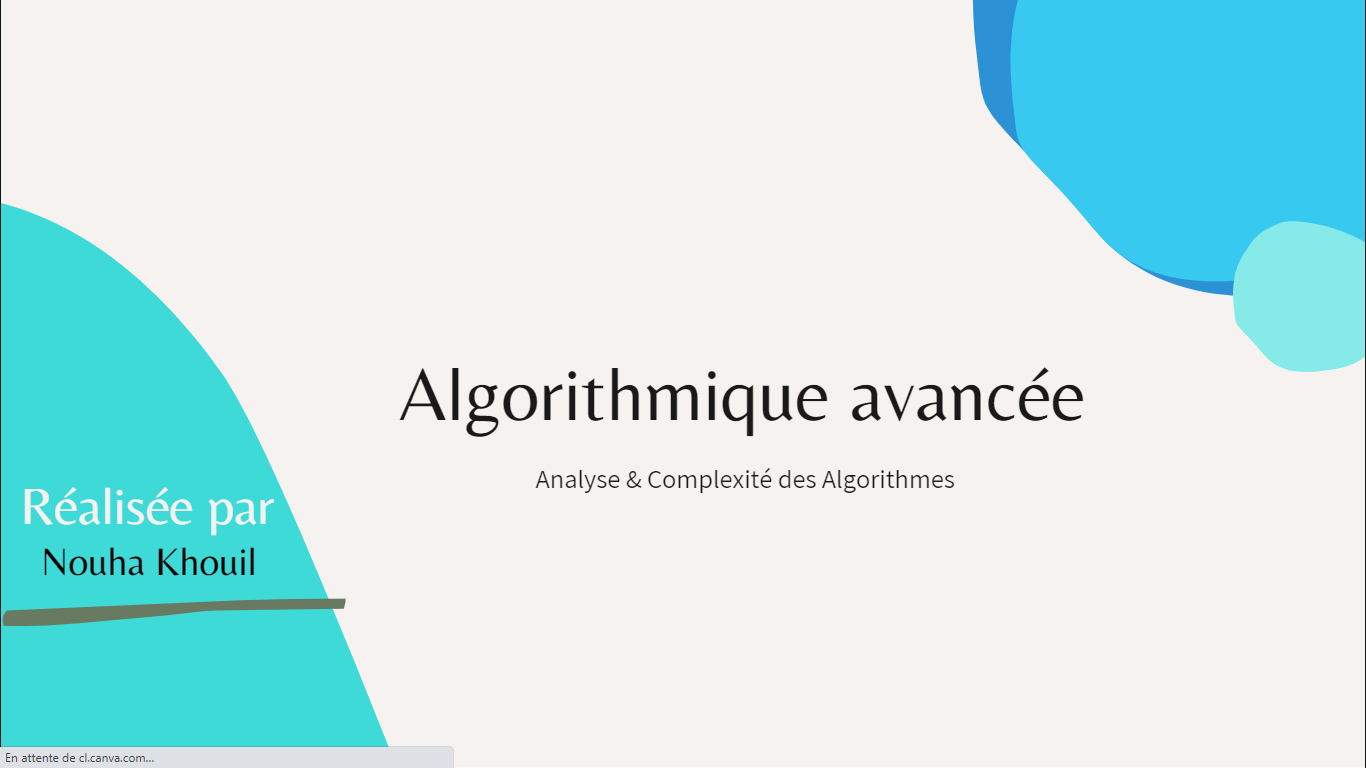

In [1]:
#imporatation
import time
from random import randint
import sys
from scipy import *

In [2]:

class Compteur(object):
    def __init__(self, nom):
        self.nom = nom

    def __enter__(self):
        self.t_debut = time.time()

    def __exit__(self, exc_ty, exc_val, exc_tb):
        t_fin = time.time()
        print('{}: {}'.format(self.nom, t_fin - self.t_debut))


if __name__ == "__main__":
    n = 10000000
    with Compteur('Boucle for'):
        for i in range(n):
            pass
    with Compteur('Boucle while'):
        while n > 0:
            n -= 1

Boucle for: 1.6064808368682861
Boucle while: 3.463130474090576


## Les différents méthode de Tri

In [3]:
"""
Comparaison des performances de plusieurs algorithmes de tri écrit en Python :
- tri par sélection
- tri par sélection récursif
- tri par insertion
- tri fusion
- tri bulle
- tri rapide
"""

sys.setrecursionlimit(10005)


def tri_selection(t, n):
    """
    Tri par sélection
    On détermine la position du plus petit élément, on le met en première
    position et on itère le procédé sur le tableau restant.
    Complexité en 0(n2) dans tous les cas.
    :param t: tableau à trier
    :param n: taille du tableau
    :return: tableau trié
    """
    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t
    for i in range(n-1):
        # On suppose que le min est en premier
        min = t[i]
        imin = i
        for j in range(i+1, n):
            if t[j] < min:
                # On met à jour le min
                min = t[j]
                imin = j
        if imin != i:
            # On pertmute pour mettre le min en premier
            t[imin] = t[i]
            t[i] = min
    return t


def tri_recursif(t, n):
    """
    Tri par sélection récursif
    On détermine la position du plus grand élément et on le met en dernière
    position. On réappelle alors la fonction tri_recursif sur le sous tableau
    composé des n-1 premiers éléments de t.
    Complexité en O(n**2) dans tous les cas.
    :param t:
    :param n:
    :return:
    """
    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t
    # On suppose que le max est en dernier
    max = t[n-1]
    imax = n-1
    for i in range(n-2):
        if t[i] > max:
            # On met à jour le max
            max = t[i]
            imax = i
    if imax != n-1:
        # On permute pour mettre le max en dernier
        t[imax] = t[n-1]
        t[n-1] = max
    # Appel de tri_recursif sur t de taille n-1 pour trier le reste du tableau
    t = tri_recursif(t, n-1)
    return t


def tri_insertion(t, n):
    """
    Tri par insertion
    On ordonne les deux premiers éléments.
    On insère le 3ème de manière à ce que les 3 soient ordonnés.
    On insère le i-ème de manière à ce que les i éléments soient ordonnées.
    La complèxité est en O(n**2) dans le pire des cas.
    :param t:
    :param n:
    :return:
    """
    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t
    for i in range(2, n):
        temp = t[i]
        j = i - 1
        while t[j] > t[i] and j >= 0:
            t[j+1] = t[j]
            j -= 1
        t[j] = temp
    return t


def tri_fusion(t, n):
    """
    Tri fusion
    On découpe le tableau à trier en deux sous-tableaux de taille n/2.
    On trie alors les deux sous-tableaux récursivement, ou on ne fait rien
    s'ils sont de taille 1.
    On reconstitue le tableau trié initial en fusionnant les deux sous-tableaux
    triés.
    La complexité est en O(n*log(n)) dans le pire des cas.
    :param t:
    :param n:
    :return:
    """
    def vidage(ta, pa, na, t, p):
        """
        Copie ta de taille na à partir de la position pa dans t à partir de p
        :param ta: tableau à copier
        :param pa: position à partir de laquelle copier
        :param na: taille de ta
        :param t: tableau de destination
        :param p: position à partir de laquelle coller
        :return:
        """
        for i in range(pa, na):
            t[p] = ta[i]
            p += 1
        return t

    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t

    # Cas général : on découpe le tableau en 2 partie que l'on trie
    p = n // 2
    t1 = t[:p]
    n1 = len(t1)
    t1 = tri_fusion(t1, n1)
    t2 = t[p:]
    n2 = len(t2)
    t2 = tri_fusion(t2, n2)
    # Fusion des deux parties
    p1, p2, p = 0, 0, 0 # position dans t1, t2 et t
    while p1 < n1 and p2 < n2:
        if t1[p1] < t2[p2]:
            # On met t1[p1] dans t
            t[p] = t1[p1]
            p1 += 1
        else:
            # On met t2[p2] dans t
            t[p] = t2[p2]
            p2 += 1
        p += 1
    if p1 == len(t1):
        vidage(t2, p2, len(t2), t, p)
    else:
        vidage(t1, p1, len(t1), t, p)
    return t


def tri_bulle(t, n):
    """
    Tri bulle
    On compare les couples d'éléments successifs pour placer systématiquement
    le plus grand après le plus petit. Un parcours complet du tableau selon
    ce processus nous assure que le plus grand élément est en dernière
    position. On réitère alors le processus sur le sous tableau restant.
    Complexité en O(n**2).
    :param t:
    :param n:
    :return:
    """
    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t
    for i in range(n-1):
        for j in range(n-1-i):
            if t[j] > t[j+1]:
                # On permute
                temp = t[j]
                t[j] = t[j+1]
                t[j+1] = temp
    return t


def tri_rapide(t, n):
    """
    Tri rapide
    On choisit un élément du tableau au hasard qui sera 'pivot' et on permute
    tous les éléments de manière à placer à gauche du pivot les éléments qui
    lui sont inférieurs, et à droite ceux qui lui sont supérieurs.
    On trie alors de la meme manière les deux moitiés de part et d'autre du
    pivot.
    Complexité en O(nlog(n)).
    :param t:
    :param n:
    :return:
    """
    def tri_rapide(t, i, j):
        if i >= j:
            # Pas besoin de trier
            return t
        p = i
        # On place les éléments plus petits que le pivot (t[j-1]) au début
        for k in range(i, j-1):
            if t[k] <= t[j-1]:
                t[k], t[p] = t[p], t[k]
                p += 1
        # On remet le pivot après les éléments plus petits
        t[j-1], t[p] = t[p], t[j-1]
        # On trie les deux parties
        tri_rapide(t, i, p-1)
        tri_rapide(t, p+1, j-1)
        return t

    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t

    t = tri_rapide(t, 0, n)
    return t




## 1er Cas : N = 1000

In [4]:
if __name__ == '__main__':
    t = [randint(0, 1) for i in range(5000)]
    with Compteur("Tri rapide"):
        t7 = tri_rapide(t, len(t))
        
        

Tri rapide: 2.6194725036621094


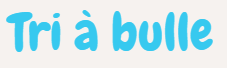

In [ ]:
if __name__ == '__main__':
    t = [randint(0, 1) for i in range(5000)]
   # print ("taille de tableau = ",len(t))

    with Compteur("Tri par sélection"):
        t2 = tri_selection(t, len(t))

    with Compteur("Tri par sélection récursif"):
        t3 = tri_recursif(t, len(t))

    with Compteur("Tri par insertion"):
        t4 = tri_insertion(t, len(t))

    with Compteur("Tri fusion"):
        t5 = tri_fusion(t, len(t))

    with Compteur("Tri bulle"):
        t6 = tri_bulle(t, len(t))

    with Compteur("Tri rapide"):
        t7 = tri_rapide(t, len(t))
        


Tri par sélection: 2.5093419551849365


In [24]:
if __name__ == '__main__':
    t = [randint(0, 1000) for i in range(2000)]
   # print ("taille de tableau = ",len(t))

    with Compteur("Tri par sélection"):
        t2 = tri_selection(t, len(t))

    with Compteur("Tri par sélection récursif"):
        t3 = tri_recursif(t, len(t))

    with Compteur("Tri par insertion"):
        t4 = tri_insertion(t, len(t))

    with Compteur("Tri fusion"):
        t5 = tri_fusion(t, len(t))

    with Compteur("Tri bulle"):
        t6 = tri_bulle(t, len(t))

    with Compteur("Tri rapide"):
        t7 = tri_rapide(t, len(t))

Tri par sélection: 0.46587610244750977
Tri par sélection récursif: 0.3836052417755127
Tri par insertion: 0.0
Tri fusion: 0.03124856948852539
Tri bulle: 0.8987362384796143
Tri rapide: 0.9874510765075684


In [25]:
if __name__ == '__main__':
    t = [randint(0, 1000) for i in range(3000)]
   # print ("taille de tableau = ",len(t))

    with Compteur("Tri par sélection"):
        t2 = tri_selection(t, len(t))

    with Compteur("Tri par sélection récursif"):
        t3 = tri_recursif(t, len(t))

    with Compteur("Tri par insertion"):
        t4 = tri_insertion(t, len(t))

    with Compteur("Tri fusion"):
        t5 = tri_fusion(t, len(t))

    with Compteur("Tri bulle"):
        t6 = tri_bulle(t, len(t))

    with Compteur("Tri rapide"):
        t7 = tri_rapide(t, len(t))

Tri par sélection: 0.9817323684692383
Tri par sélection récursif: 0.9345402717590332
Tri par insertion: 0.0
Tri fusion: 0.031247615814208984
Tri bulle: 1.5929546356201172
Tri rapide: 1.9629456996917725


In [26]:
if __name__ == '__main__':
    t = [randint(0, 1000) for i in range(3100)]
   # print ("taille de tableau = ",len(t))

    with Compteur("Tri par sélection"):
        t2 = tri_selection(t, len(t))

    with Compteur("Tri par sélection récursif"):
        t3 = tri_recursif(t, len(t))

    with Compteur("Tri par insertion"):
        t4 = tri_insertion(t, len(t))

    with Compteur("Tri fusion"):
        t5 = tri_fusion(t, len(t))

    with Compteur("Tri bulle"):
        t6 = tri_bulle(t, len(t))

    with Compteur("Tri rapide"):
        t7 = tri_rapide(t, len(t))

Tri par sélection: 1.0931429862976074
Tri par sélection récursif: 1.0037965774536133
Tri par insertion: 0.01562666893005371
Tri fusion: 0.031246185302734375
Tri bulle: 1.7347829341888428
Tri rapide: 2.1651344299316406


In [27]:
if __name__ == '__main__':
    t = [randint(0, 1000) for i in range(3200)]
   # print ("taille de tableau = ",len(t))

    with Compteur("Tri par sélection"):
        t2 = tri_selection(t, len(t))

    with Compteur("Tri par sélection récursif"):
        t3 = tri_recursif(t, len(t))

    with Compteur("Tri par insertion"):
        t4 = tri_insertion(t, len(t))

    with Compteur("Tri fusion"):
        t5 = tri_fusion(t, len(t))

    with Compteur("Tri bulle"):
        t6 = tri_bulle(t, len(t))

    with Compteur("Tri rapide"):
        t7 = tri_rapide(t, len(t))

Tri par sélection: 1.2108087539672852
Tri par sélection récursif: 1.6874868869781494
Tri par insertion: 0.0
Tri fusion: 0.04377007484436035
Tri bulle: 2.0585501194000244
Tri rapide: 2.4069602489471436


## 2éme Cas : n entre 20 000 et 100 000 avec un pas de 5000

In [28]:
 tri par insertion et dont la complexité est $O(n^2)$
    

SyntaxError: invalid syntax (<ipython-input-28-9ef87583659b>, line 1)